In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score;
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [15]:
df=pd.read_csv('data/stud.csv')
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
X=df.drop(columns=['math_score'],axis=1)
y=df['math_score']

In [17]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [18]:
num_features=X.select_dtypes(exclude="object").columns
cat_features=X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
  [
    ("OneHotEncoder",oh_transformer,cat_features),
    ("StandardScalar",numeric_transformer,num_features)
  ]
)

In [19]:
X=preprocessor.fit_transform(X)


In [20]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [21]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=12)


In [22]:
def evaluate_model(true,predicted):
  mae=mean_absolute_error(true,predicted)
  mse=mean_squared_error(true,predicted)
  rmse=np.sqrt(mean_squared_error(true,predicted))
  r2score=r2_score(true,predicted)
  return mae,mse,rmse,r2score


In [25]:
models={
  "Linear Regression" : LinearRegression(),
  "Lasso":Lasso(),
  "Ridge":Ridge(),
  "K-Neighbors Regressor":KNeighborsRegressor(),
  "Decision Tree":DecisionTreeRegressor(),
  "Random Forest Regressor":RandomForestRegressor(),
  "XGB Regressor":XGBRegressor(),
  "CatBoost Regressor":CatBoostRegressor(),
  "AdaBoost Regressor":AdaBoostRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
  model=list(models.values())[i]
  model.fit(X_train,y_train)

  y_train_pred=model.predict(X_train)
  y_test_pred=model.predict(X_test)
  
  # evaluate Train and test dataset
  model_train_mae,model_train_mse,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
  model_test_mae,model_test_mse,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)
  print(list(models.keys())[i])
  model_list.append(list(models.keys())[i])

  print('Model Performance for Training set')
  print("-mae : {:.4f}".format(model_train_mae))
  print("-mse: {:.4f}".format(model_train_mse))
  print("-rmse : {:.4f}".format(model_train_rmse))
  print("-r2_score : {:.4f}".format(model_train_r2))
  
  print('-----------------------------------')

  print('Model Performance for Test set')
  print("-mae : {:.4f}".format(model_test_mae))
  print("-mse: {:.4f}".format(model_test_mse))
  print("-rmse : {:.4f}".format(model_test_rmse))
  print("-r2_score : {:.4f}".format(model_test_r2))
  r2_list.append(model_test_r2)
  
  print('='*35)
  print('\n')
  

Linear Regression
Model Performance for Training set
-mae : 4.3846
-mse: 29.6411
-rmse : 5.4444
-r2_score : 0.8754
-----------------------------------
Model Performance for Test set
-mae : 3.8662
-mse: 25.0573
-rmse : 5.0057
-r2_score : 0.8778


Lasso
Model Performance for Training set
-mae : 5.2493
-mse: 43.7103
-rmse : 6.6114
-r2_score : 0.8162
-----------------------------------
Model Performance for Test set
-mae : 4.8720
-mse: 38.9505
-rmse : 6.2410
-r2_score : 0.8101


Ridge
Model Performance for Training set
-mae : 4.3832
-mse: 29.5757
-rmse : 5.4384
-r2_score : 0.8756
-----------------------------------
Model Performance for Test set
-mae : 3.8813
-mse: 25.2017
-rmse : 5.0201
-r2_score : 0.8771


K-Neighbors Regressor
Model Performance for Training set
-mae : 4.8824
-mse: 36.7601
-rmse : 6.0630
-r2_score : 0.8454
-----------------------------------
Model Performance for Test set
-mae : 4.7952
-mse: 38.4704
-rmse : 6.2025
-r2_score : 0.8124


Decision Tree
Model Performance for 

In [26]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.877812
2,Ridge,0.877108
8,AdaBoost Regressor,0.847330
7,CatBoost Regressor,0.844275
5,Random Forest Regressor,0.831449
3,K-Neighbors Regressor,0.812405
1,Lasso,0.810064
6,XGB Regressor,0.796748
4,Decision Tree,0.660567


In [27]:
# so the best model is Linear Regression and ridge

lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.78


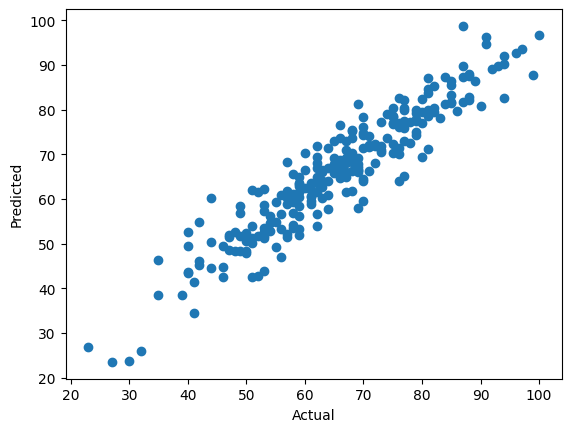

In [28]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

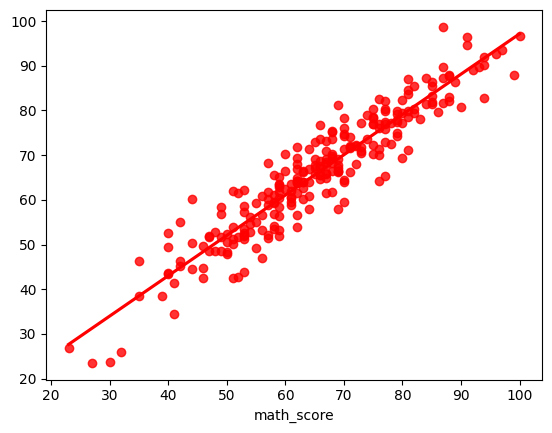

In [29]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [30]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
518,66,67.203125,-1.203125
871,70,64.468750,5.531250
797,70,76.109375,-6.109375
274,88,82.937500,5.062500
325,82,85.375000,-3.375000
...,...,...,...
106,87,89.687500,-2.687500
702,87,87.375000,-0.375000
651,68,66.343750,1.656250
366,69,57.953125,11.046875
